<a href="https://colab.research.google.com/github/Uma07-rm/oasis-data-analytics/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sa = pd.read_csv('/content/archive.zip')

In [ ]:
print(sa.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [ ]:
print(sa.head())

    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

In [ ]:
missing_values = sa.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


In [ ]:
sa.dropna(inplace=True)

In [ ]:
for col in sa.columns:
    if sa[col].dtype == 'object' or sa[col].dtype == 'string':
        try:
            sa[col] = pd.to_numeric(sa[col], errors='coerce')
        except:
            pass

In [ ]:
if 'Date' in sa.columns:
    sa['Date'] = pd.to_datetime(sa['Date'])

In [ ]:
mean_imputed_sa = sa.fillna(sa.mean())

In [ ]:
sa.drop_duplicates(inplace=True)

In [ ]:
sa.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
cleaned_sa = pd.read_csv('cleaned_dataset.csv')

In [ ]:
print(cleaned_sa.describe())

       Category  Item  Serving Size     Calories  Calories from Fat  \
count       0.0   0.0           0.0   250.000000         250.000000   
mean        NaN   NaN           NaN   378.960000         131.620000   
std         NaN   NaN           NaN   237.517107         128.228099   
min         NaN   NaN           NaN     0.000000           0.000000   
25%         NaN   NaN           NaN   220.000000          30.000000   
50%         NaN   NaN           NaN   340.000000         110.000000   
75%         NaN   NaN           NaN   507.500000         200.000000   
max         NaN   NaN           NaN  1880.000000        1060.000000   

        Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
count  250.000000                 250.000000     250.000000   
mean    14.666000                  22.588000       6.210000   
std     14.246378                  21.947598       5.314686   
min      0.000000                   0.000000       0.000000   
25%      3.500000                   5.250000 

In [ ]:
descriptive_stats = sa.describe(include='all')
print("Descriptive Statistics:\n", descriptive_stats)

modes = sa.mode().iloc[0]
print("Mode:\n", modes)

Descriptive Statistics:
        Category  Item  Serving Size     Calories  Calories from Fat  \
count       0.0   0.0           0.0   250.000000         250.000000   
mean        NaN   NaN           NaN   378.960000         131.620000   
std         NaN   NaN           NaN   237.517107         128.228099   
min         NaN   NaN           NaN     0.000000           0.000000   
25%         NaN   NaN           NaN   220.000000          30.000000   
50%         NaN   NaN           NaN   340.000000         110.000000   
75%         NaN   NaN           NaN   507.500000         200.000000   
max         NaN   NaN           NaN  1880.000000        1060.000000   

        Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
count  250.000000                 250.000000     250.000000   
mean    14.666000                  22.588000       6.210000   
std     14.246378                  21.947598       5.314686   
min      0.000000                   0.000000       0.000000   
25%      3.500000   

In [ ]:
nutritional_columns = [
    'Calories', 'Total Fat', 'Saturated Fat', 'Cholesterol', 'Sodium',
    'Carbohydrates', 'Sugars', 'Protein'
]

descriptive_stats = df[nutritional_columns].agg(['mean', 'median', 'std', 'min', 'max', 'skew', 'kurtosis']).transpose()

In [ ]:
modes = df[nutritional_columns].mode().iloc[0]
descriptive_stats['mode'] = modes

print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
                   mean  median         std  min     max      skew   kurtosis  \
Calories       378.960   340.0  237.517107  0.0  1880.0  1.521651   6.137216   
Total Fat       14.666    13.0   14.246378  0.0   118.0  2.146785  10.737655   
Saturated Fat    6.210     5.0    5.314686  0.0    20.0  0.625085  -0.465274   
Cholesterol     56.880    35.0   88.430455  0.0   575.0  3.740148  16.791831   
Sodium         513.520   195.0  581.314472  0.0  3600.0  1.497957   2.728983   
Carbohydrates   48.508    45.0   27.789692  0.0   141.0  0.991984   1.515926   
Sugars          29.908    18.0   28.796955  0.0   128.0  1.030065   0.501162   
Protein         13.720    12.0   11.429968  0.0    87.0  1.585121   6.085597   

                mode  
Calories         0.0  
Total Fat        0.0  
Saturated Fat    0.0  
Cholesterol      0.0  
Sodium         180.0  
Carbohydrates    0.0  
Sugars           0.0  
Protein          0.0  


In [ ]:
sns.set_style("whitegrid")

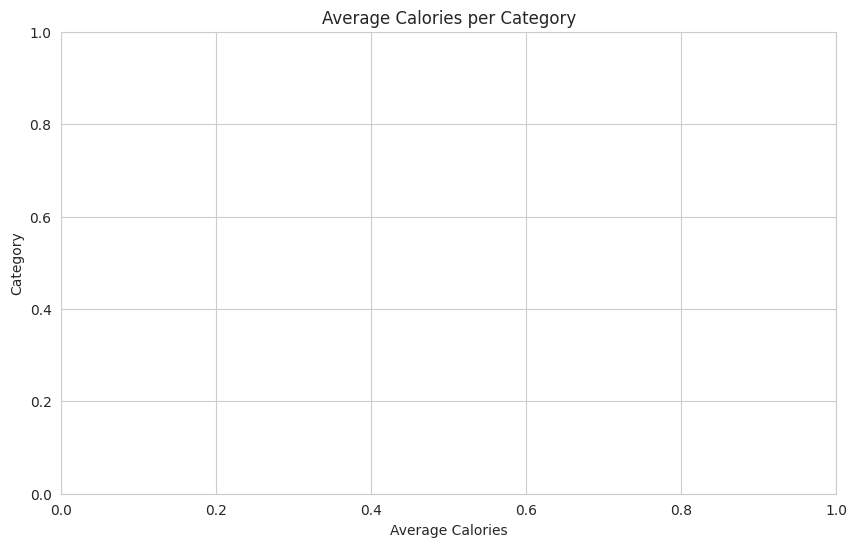

In [ ]:
plt.figure(figsize=(10, 6))
avg_calories = df.groupby('Category')['Calories'].mean().sort_values()
sns.barplot(x=avg_calories, y=avg_calories.index, palette='viridis')
plt.title('Average Calories per Category')
plt.xlabel('Average Calories')
plt.ylabel('Category')
plt.show()

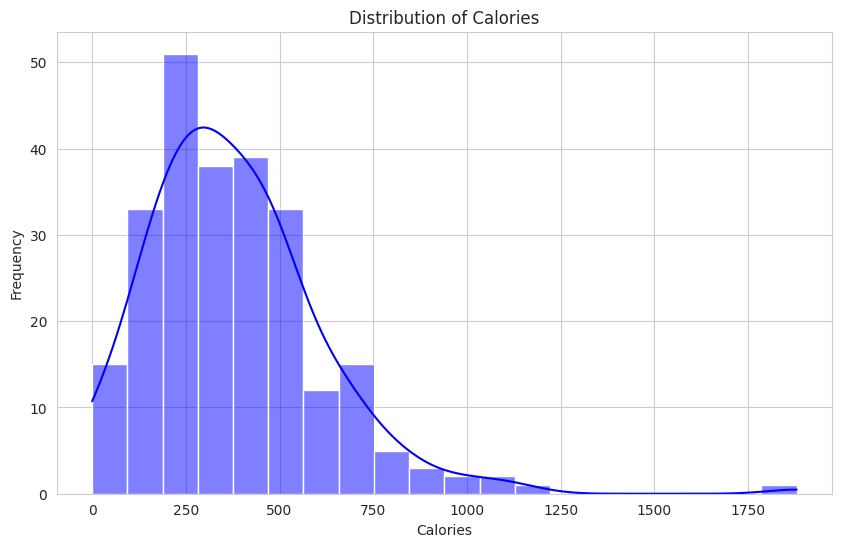

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Calories'], bins=20, kde=True, color='blue')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

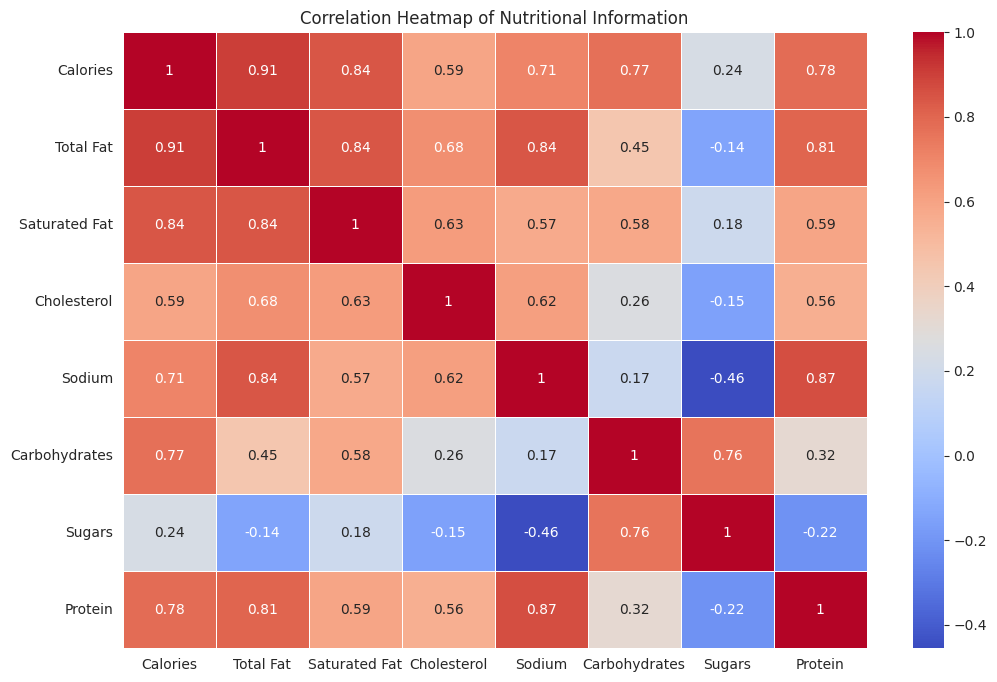

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = df[nutritional_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Nutritional Information')
plt.show()

<Figure size 1400x1000 with 0 Axes>

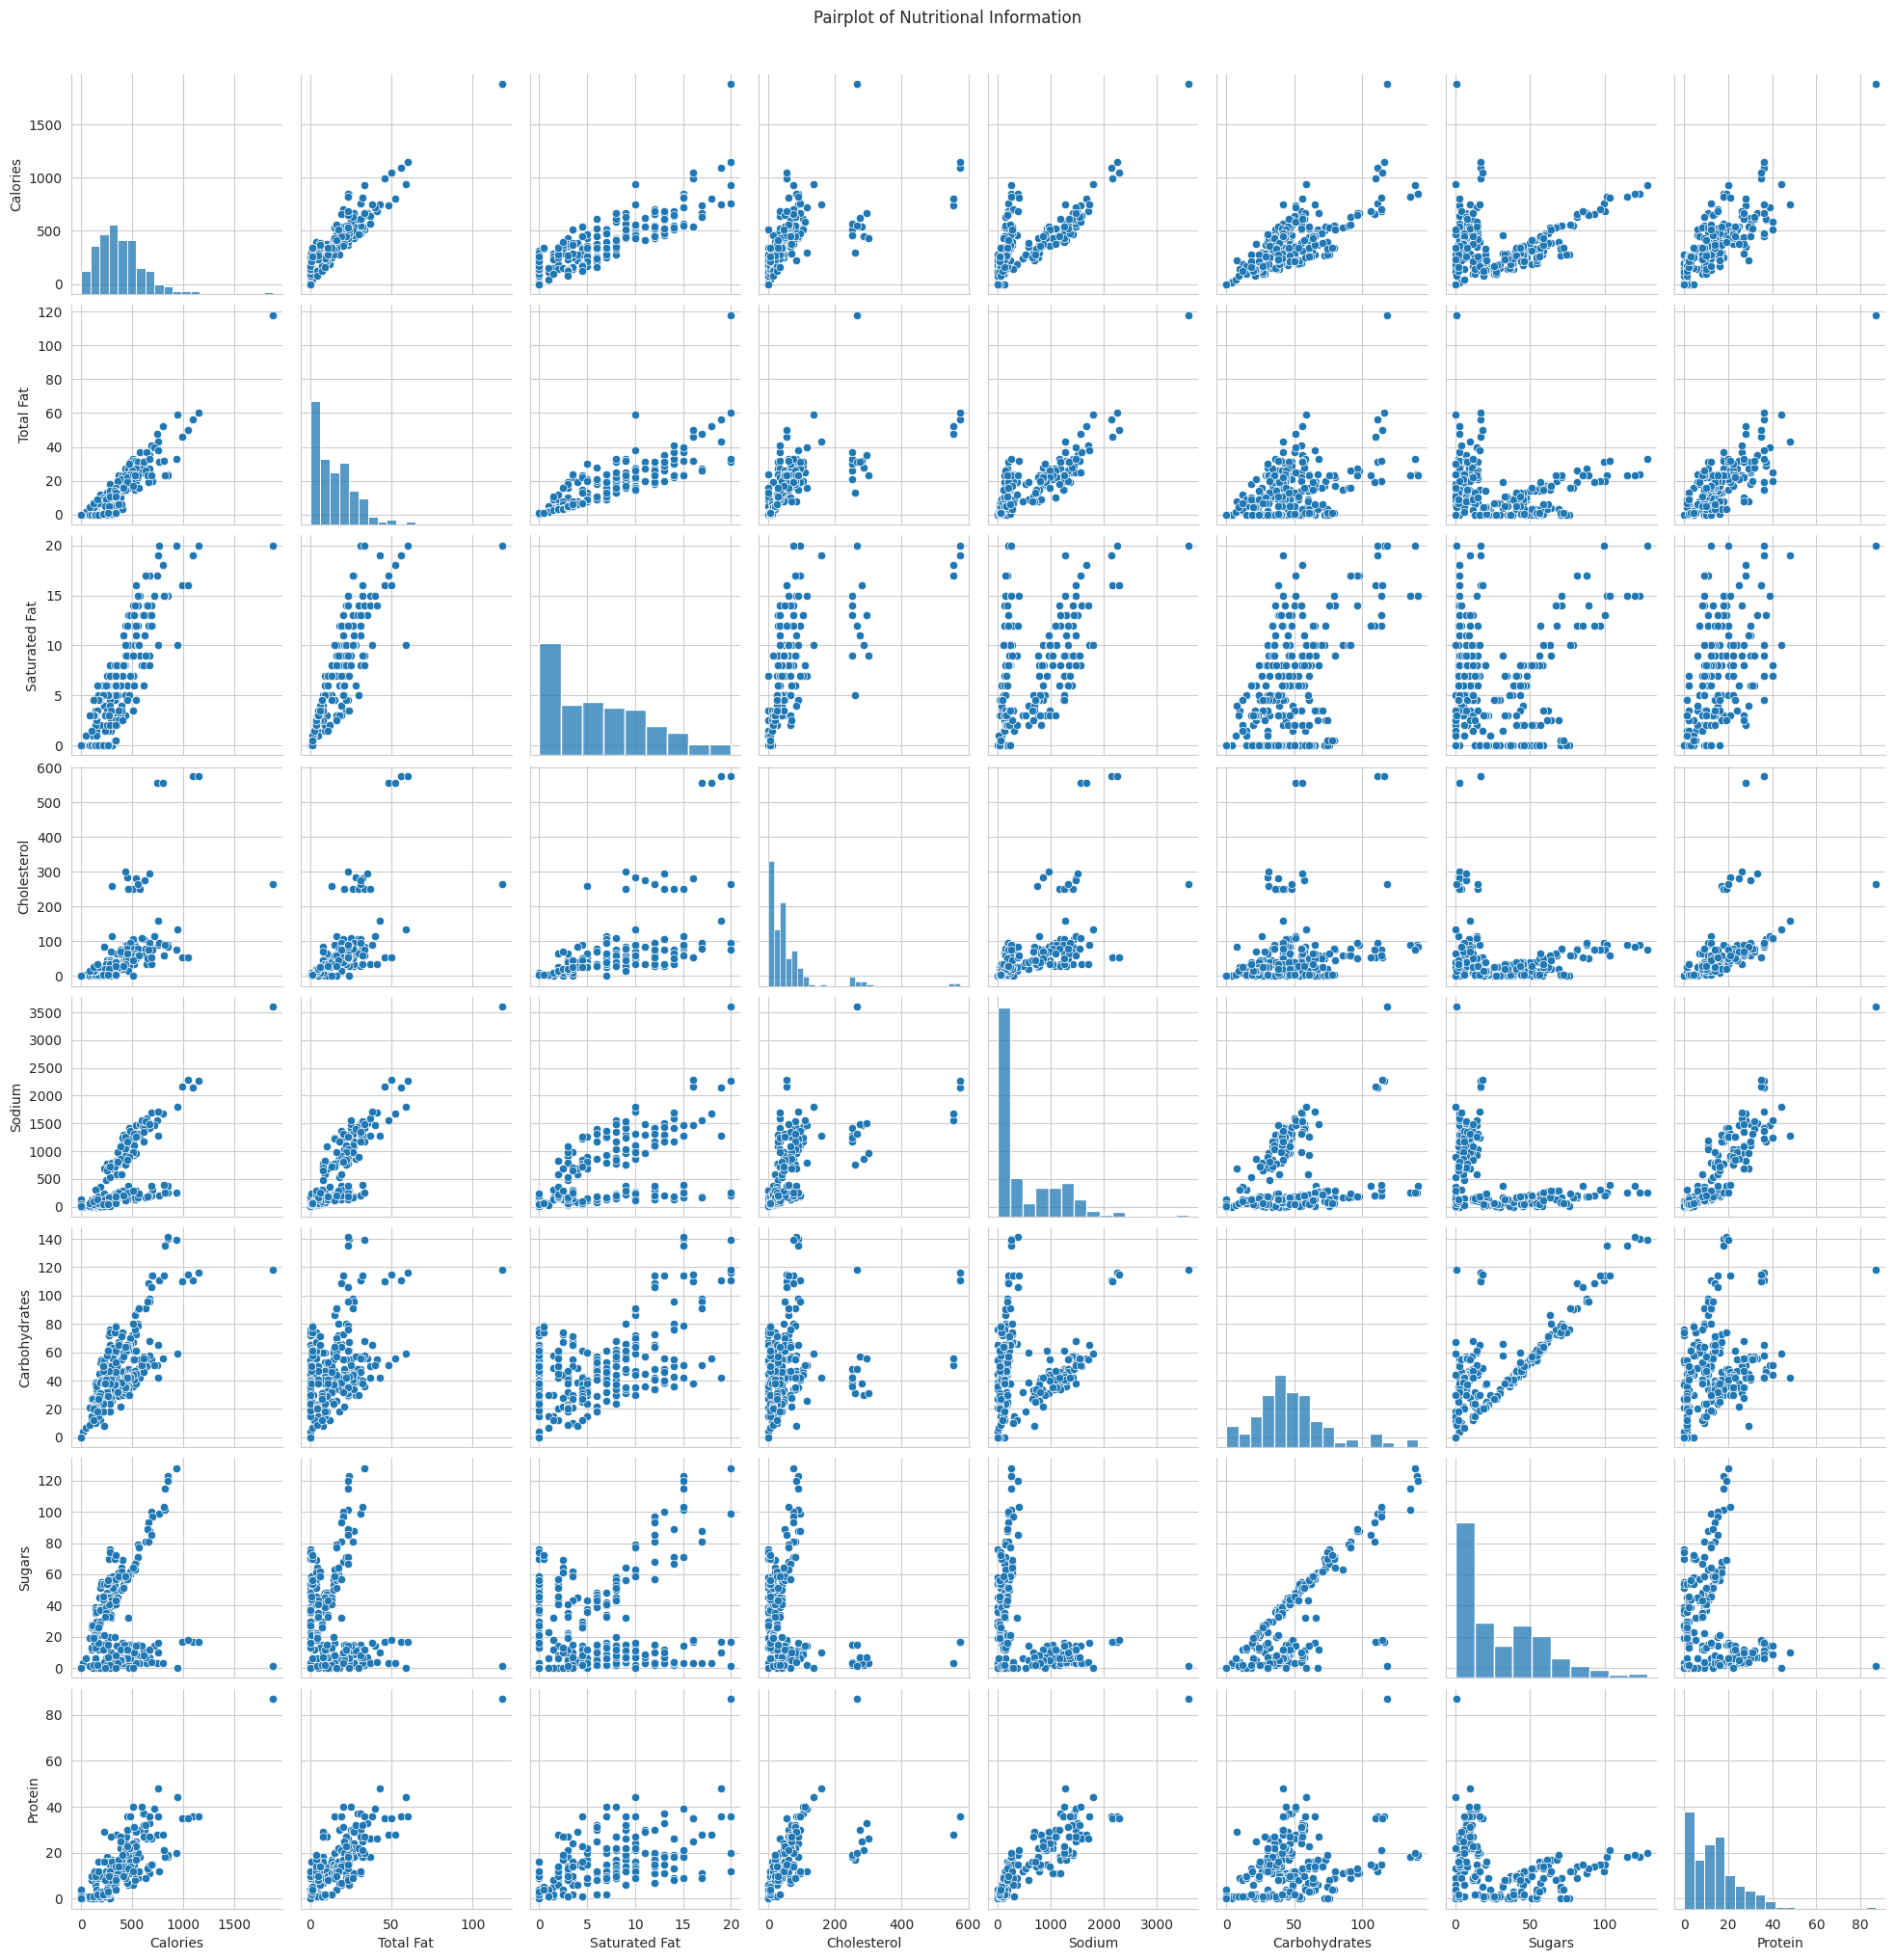

In [ ]:
plt.figure(figsize=(14, 10))
sns.pairplot(df[nutritional_columns])
plt.suptitle('Pairplot of Nutritional Information', y=1.02)
plt.show()